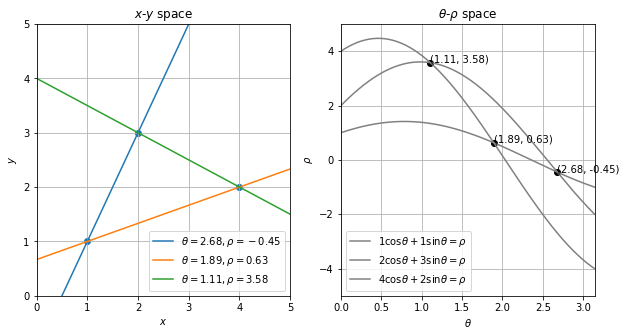

In [8]:
import itertools

import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

points = np.array([[1, 1], [2, 3], [4, 2]])

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

# ax1
ax1.set_title(r"$x$-$y$ space")
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax1.grid()
ax1.scatter(points[:, 0], points[:, 1])

# ax2
ax2.set_title(r"$\theta$-$\rho$ space")
ax2.set_xlim(0, np.pi)
ax2.set_ylim(-5, 5)
ax2.set_xlabel(r"$\theta$")
ax2.set_ylabel(r"$\rho$")
ax2.grid()

#　x,y空間の点のパラメータ空間の曲線になる。
for x, y in points:
    theta = np.linspace(0, np.pi, 1000)
    rho = x * np.cos(theta) + y * np.sin(theta)
    ax2.plot(theta, rho, label=fr"${x} \cos \theta + {y} \sin \theta = \rho$", color="grey")


# 各点を通る直線を表す方程式を作成する。
theta, rho = sy.symbols("θ ρ")
lines = [x * sy.cos(theta) + y * sy.sin(theta) - rho for x, y in points]

# 交点を計算する。
intersections = []
for line1, line2 in itertools.combinations(lines, 2):
    # 方程式を解く。
    theta_n, rho_n = sy.nsolve([line1, line2], [theta, rho], (2, 2))
    theta_n, rho_n = float(theta_n), float(rho_n)

    # 交点を theta-rho 空間に描画する。
    ax2.text(theta_n, rho_n, f"({theta_n:.2f}, {rho_n:.2f})")
    ax2.scatter(theta_n, rho_n, c="black")

    # 交点に対応する直線をxy 空間に描画する。
    x = np.linspace(0, 5, 100)
    y = rho_n / np.sin(theta_n) - x * np.cos(theta_n) / np.sin(theta_n)
    ax1.plot(x, y, label=fr"$\theta = {theta_n:.2f}, \rho = {rho_n:.2f}$")

ax1.legend()
ax2.legend()
plt.show()